### Estimation of the wine quality

 A very frequent problem in machine learning is predicting the value of a feature of an unknown set of
samples, based on the remaining features with respect to a given dataset. This is performed by proper
analysis of the predictors, i.e. the features that will be used as inputs to the model, and the labels which
are the outputs of the model. An interesting use case, in these lines, is the estimation of the wine quality
based on its characteristics. An available dataset containing information regarding several “white” and
“red” wines can be obtained from https://archive.ics.uci.edu/static/public/186/wine+quality.zip. This
assignment requires the design and implementation of an end-to-end machine learning solution that adheres to the following:

 1) Open a Jupyter-notebook. Download the wines dataset and load the data of the “red” wines.
 
 2) What are the features describing the quality of the wines?
 
 3) Compute the descriptive statics of the dataset features and discuss about their types, ranges and completeness.
 
 4) Form the histograms of the features and discuss their distribution. Can the distribution of some features
    be improved (tending more towards the Gaussian) and how?
    
 5) Which are the features that mostly affect quality and which are those that affect it less? Provide evidence through
    correlation and discuss accordingly.
    
 6) Split the dataset into a training and a testing set retaining 80% and 20% of the total number of samples,
    respectively, using random shuffling and splitting that retains the statistical properties of the input data
    (stratified) with respect to quality.
    
 7) Scale the data with a Standard scaler and train a linear regression model. Evaluate the performance of the model, 
    using the test set, with respect to metrics such as R2-score, Mean Absolute Error, Mean Absolute Percentage Error,
    Mean Squared Error and Accuracy. Comment on the accuracy of predictions by plotting Actuals vs Predicted diagram.
    
 8) Perform 10-fold cross validation and compute the mean and standard deviation of the scores over thefolds. Is the model’s
    R2-score within the limits defined by the 10-fold cross validation?

### Solution

1.

In [1]:
# Import the necessary libraries
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import zipfile
import tempfile
import matplotlib.pyplot as plt

In [2]:
#Download and load the data
def load_wine_data():
    zip_path = Path("datasets/winequality.zip")
    if not zip_path.is_file():
        # Create directory if it does not exist
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
        # Download the dataset
        urllib.request.urlretrieve(url, zip_path)
        
        # Extract the zip file
        with zipfile.ZipFile(zip_path, 'r') as wine_zip:
            wine_zip.extractall(path="datasets")
    
    # Load the red wine data
    red_wine_data = pd.read_csv(Path("datasets/winequality-red.csv"), sep=';')
    return red_wine_data

# Load the red wine data
red_wine_data = load_wine_data()

In [3]:
# Inspect the data
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2.

In [4]:
# The features describing the quality of the wines
print("The features describing the quality of the wines are:")
for column in red_wine_data.columns[:-1]:
    print(f"- {column}")

The features describing the quality of the wines are:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol


3.

In [5]:
# Compute the descriptive statics 
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Check for missing values in the dataset and the type
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Types, ranges and completeness
for column in red_wine_data.columns:
    print(f"\nFeature: {column}")
    print(f"Type: {red_wine_data[column].dtype}")
    range=red_wine_data[column].max()-red_wine_data[column].min()
    print(f"Range:  {red_wine_data[column].max()} - {red_wine_data[column].min()} = {round(range,2)}")
    print(f"Missing values: {red_wine_data[column].isnull().sum()}")


Feature: fixed acidity
Type: float64
Range:  15.9 - 4.6 = 11.3
Missing values: 0

Feature: volatile acidity
Type: float64
Range:  1.58 - 0.12 = 1.46
Missing values: 0

Feature: citric acid
Type: float64
Range:  1.0 - 0.0 = 1.0
Missing values: 0

Feature: residual sugar
Type: float64
Range:  15.5 - 0.9 = 14.6
Missing values: 0

Feature: chlorides
Type: float64
Range:  0.611 - 0.012 = 0.6
Missing values: 0

Feature: free sulfur dioxide
Type: float64
Range:  72.0 - 1.0 = 71.0
Missing values: 0

Feature: total sulfur dioxide
Type: float64
Range:  289.0 - 6.0 = 283.0
Missing values: 0

Feature: density
Type: float64
Range:  1.00369 - 0.99007 = 0.01
Missing values: 0

Feature: pH
Type: float64
Range:  4.01 - 2.74 = 1.27
Missing values: 0

Feature: sulphates
Type: float64
Range:  2.0 - 0.33 = 1.67
Missing values: 0

Feature: alcohol
Type: float64
Range:  14.9 - 8.4 = 6.5
Missing values: 0

Feature: quality
Type: int64
Range:  8 - 3 = 5
Missing values: 0


The dataset does not contain any missing values, which means no imputation or data cleaning is required at this stage. However, the ranges of the features vary significantly. For example, some chemical properties such as fixed acidity and residual sugar are on very different scales compared to others like pH or alcohol. This variation in feature ranges suggests that scaling or normalization will likely be important before applying most machine learning models, particularly those sensitive to feature magnitude (e.g., k-nearest neighbors, SVMs, or gradient-based methods). Standardization (z-score scaling) or min–max scaling would help ensure that each feature contributes more comparably to model training.

4.

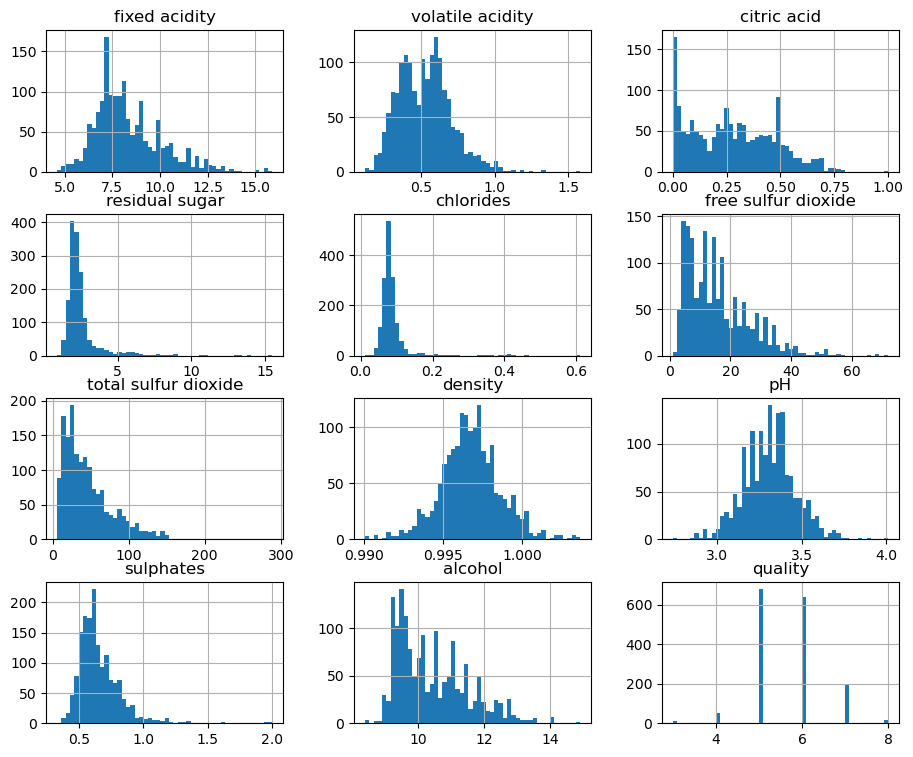

In [8]:
#Form the histograms of the features
red_wine_data.hist(bins=50, figsize=(11, 9))
plt.show()

Some features such as density or pH are normally distributed(Gaussian), while others (for example residual sugar) are right skewed. A common way to do this for positive features with a heavy tail to the right is to replace the feature with its square root (or raise the feature to a power between 0 and 1). If the feature has a really long and heavy tail, such as residual sugar, then replacing the feature with its logarithm may help. Another approach to handle heavy-tailed features consists in bucketizing the feature. This means chopping its distribution into roughly equal-sized buckets, and replacing each feature value with the index of the bucket it belongs to.

5.

In [9]:
correlation_matrix = red_wine_data.corr()[:-1]
print(correlation_matrix['quality'].sort_values(ascending=False))

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


The features that seem to affect wine quality positively are alcohol, sulphates, and citric acid.
Features like volatile acidity, density, and chlorides have the most negative impact on quality.
Some features, such as residual sugar and pH, appear to have very little or negligible correlation with quality.

6.

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Perform stratified split directly on the DataFrame with `quality` included
train_set, test_set = train_test_split(
    red_wine_data, test_size=0.2, stratify=red_wine_data['quality'], random_state=42)

In [11]:
# Verify the class distribution in overall dataset and in both training and test sets

print("Dataset distribution:")
print(round(red_wine_data['quality'].value_counts(normalize=True).sort_index(),3))

print("Training set class distribution:")
print(round(train_set['quality'].value_counts(normalize=True).sort_index(),3))

print("\nTest set class distribution:")
print(round(test_set['quality'].value_counts(normalize=True).sort_index(),3))

Dataset distribution:
quality
3    0.006
4    0.033
5    0.426
6    0.399
7    0.124
8    0.011
Name: proportion, dtype: float64
Training set class distribution:
quality
3    0.006
4    0.033
5    0.426
6    0.399
7    0.124
8    0.012
Name: proportion, dtype: float64

Test set class distribution:
quality
3    0.006
4    0.034
5    0.425
6    0.400
7    0.125
8    0.009
Name: proportion, dtype: float64


In [12]:
# Split the dataset into features (X) and target (y)
# X includes every column except the last one (quality) and y includes only the last
X_train = train_set.iloc[:, :-1]  
y_train = train_set.iloc[:, -1] 
X_test = test_set.iloc[:, :-1]    
y_test = test_set.iloc[:, -1] 

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 11)
y_train shape: (1279,)
X_test shape: (320, 11)
y_test shape: (320,)


7.

In [14]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred) #Indicates how well the model explains the variance in the data
mae = mean_absolute_error(y_test, y_pred) #Measure the error in predictions
mse = mean_squared_error(y_test, y_pred) #Measure the error in predictions
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100 #Represents the percentage error between actual and predicted values

In [18]:
# Print evaluation metrics with 3 decimal points
print(f'R2 Score: {r2:.3f}')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

R2 Score: 0.370
Mean Absolute Error (MAE): 0.495
Mean Squared Error (MSE): 0.406
Mean Absolute Percentage Error (MAPE): 9.107%


Accuracy is a measure for classification, not regression. We cannot calculate accuracy for a regression model.

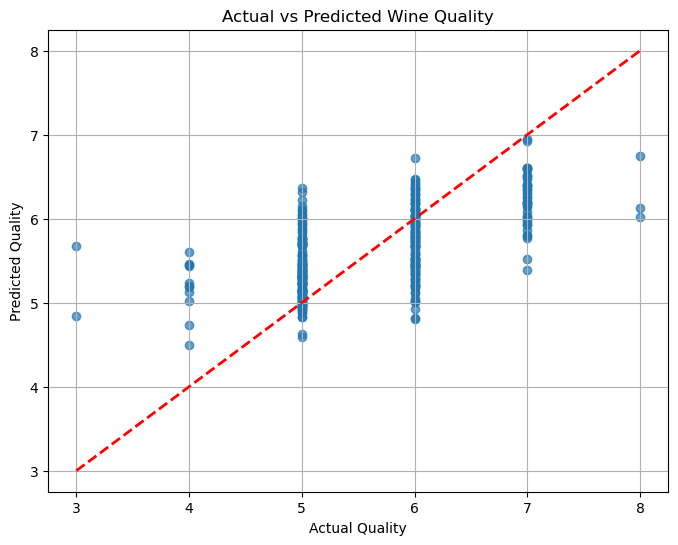

In [19]:
# Plot Actuals vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

### Actual vs. Predicted Wine Quality

The scatter plot compares the **actual wine quality scores** (x-axis) against the **predicted scores** from the linear regression model (y-axis).  

- The red dashed line represents the **ideal case** where predictions perfectly match the actual values.  
- Most points cluster reasonably close to this line, indicating that the model captures general trends in wine quality.  
- However, the spread around the line shows that the predictions are not exact. In particular:
  - Some underestimation and overestimation occurs, especially at the lower and higher ends of wine quality.  
  - This suggests the model struggles with extreme cases and tends to regress towards the mean.  

Overall, the closer the points are to the red diagonal line, the better the predictions match the actual values.

8.

If we scale the data before cross-validation, it can cause data leakage (information from the test folds leaking into the training folds).

The proper way is to wrap preprocessing and the model inside a Pipeline, so that scaling is fit only on the training fold during cross-validation.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Build pipeline with scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Perform 10-fold cross-validation on the pipeline
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=10)

In [25]:
# Evaluate mean and standard deviation
mean = np.mean(cross_val_scores)
std = np.std(cross_val_scores)

print(f"Mean from 10-fold cross-validation: {mean:.3f}")
print(f"Standard deviation from 10-fold cross-validation: {std:.3f}")

Mean from 10-fold cross-validation: 0.338
Standard deviation from 10-fold cross-validation: 0.072


In [26]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

 To see if the model’s R2 -score is within the limits defined by the 10-fold cross validation (i.e., within mean ± std):

In [27]:
# Evaluate on the test set
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)

if r2 <= mean + std and r2 >= mean - std:
    print("R2 is within the limits of 10-fold cross-validation")
else:
    print("R2 is not within the limits of 10-fold cross-validation")

R2 is within the limits of 10-fold cross-validation


## Overall Summary

The goal of this project was to **estimate wine quality** based on physicochemical properties using the Wine Quality dataset from the UCI Machine Learning Repository. The workflow followed these key steps:

1. **Data Loading and Inspection**  
   - The dataset was downloaded, extracted, and explored.  
   - No missing values were found, ensuring the dataset is clean.  
   - Feature ranges varied widely (e.g., pH vs. residual sugar), highlighting the importance of feature scaling.  

2. **Exploratory Data Analysis**  
   - Histograms showed the distribution of different wine characteristics.  
   - Correlation analysis indicated that certain features (like alcohol and volatile acidity) have stronger relationships with wine quality.  

3. **Data Preparation**  
   - A stratified train-test split ensured that the distribution of wine quality scores was preserved across training and testing sets.  
   - Features were standardized using `StandardScaler` to account for varying scales.  

4. **Modeling**  
   - A **Linear Regression model** was trained on the scaled features.  
   - Predictions showed that the model captures general trends but struggles with extreme cases, often regressing toward the mean quality scores.  

5. **Evaluation**  
   - Performance was assessed with R², MAE, MSE, and MAPE.  
   - Cross-validation was applied with a pipeline (scaler + regression) to prevent data leakage.  
   - Actual vs. Predicted plots demonstrated decent alignment but also clear variance, especially at quality extremes.  

### Useful Insights

- **Alcohol content** and **volatile acidity** appear as key predictors of wine quality, consistent with domain knowledge.  
- Since wine quality scores are ordinal and discrete, Linear Regression provides a simple baseline but is limited in capturing non-linear relationships.  
- Cross-validation revealed that the model generalizes moderately well, though variance suggests instability in some folds.  
- More advanced models (e.g., Ridge/Lasso Regression, Random Forest, Gradient Boosting, or even Classification approaches with discretized quality categories) could provide better accuracy and robustness.  

### Conclusion  

This workflow demonstrates the complete pipeline from **data acquisition → preprocessing → modeling → evaluation**, and provides a foundation for further experimentation with more complex models. The study highlights how chemical properties influence wine quality and shows that **machine learning can estimate quality scores with reasonable accuracy**, though improvements are possible with more sophisticated techniques.  
